In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import timedelta
%matplotlib inline 

In [155]:
events = pd.read_csv('events_2018-07-03-02.05.42.csv')
rec = pd.read_csv('recording_2018-07-03-06.05.14.csv')
events['timestamp'] = pd.to_datetime(events['timestamp'],unit='s')
rec['timestamps'] = pd.to_datetime(rec['timestamps'],unit='s')

In [156]:
events

,timestamp,event
0,2018-07-03 06:04:44.777309000,start
1,2018-07-03 06:05:17.131401999,low
2,2018-07-03 06:05:19.631785000,high
3,2018-07-03 06:05:22.132146000,low
4,2018-07-03 06:05:24.633006000,high
5,2018-07-03 06:05:27.133359000,low
6,2018-07-03 06:05:29.634220000,high
7,2018-07-03 06:05:32.134555000,low
8,2018-07-03 06:05:34.635401000,high
9,2018-07-03 06:05:37.136249000,low


In [157]:
events['timestamp'][2] - events['timestamp'][1]

Timedelta('0 days 00:00:02.500383')

Increments of 2500ms

In [158]:
# Go to last time and add a little buffer.
firstStamp =  rec.iloc[0]['timestamps']
firstStamp

Timestamp('2018-07-03 06:05:20.381000')

In [159]:
lastStamp = events.iloc[-1]['timestamp'] + timedelta(milliseconds=4000)
lastStamp

Timestamp('2018-07-03 06:05:43.638096')

In [160]:
events = events[(events['timestamp'] >= firstStamp) & (events['timestamp'] <= lastStamp)]
rec = rec[(rec['timestamps'] >= firstStamp) & (rec['timestamps'] <= lastStamp)]

In [161]:
events

,timestamp,event
3,2018-07-03 06:05:22.132146,low
4,2018-07-03 06:05:24.633006,high
5,2018-07-03 06:05:27.133359,low
6,2018-07-03 06:05:29.634220,high
7,2018-07-03 06:05:32.134555,low
8,2018-07-03 06:05:34.635401,high
9,2018-07-03 06:05:37.136249,low
10,2018-07-03 06:05:39.638096,high


In [162]:
rec.head()

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,2018-07-03 06:05:20.381,-15.137,7.324,57.129,27.344,-619.629
1,2018-07-03 06:05:20.385,102.051,67.871,-59.082,145.996,-45.898
2,2018-07-03 06:05:20.389,45.410,41.016,-11.230,91.797,722.656
3,2018-07-03 06:05:20.393,-74.707,-14.648,125.000,-26.855,316.406
4,2018-07-03 06:05:20.396,-45.898,-4.395,109.375,-0.977,-293.945


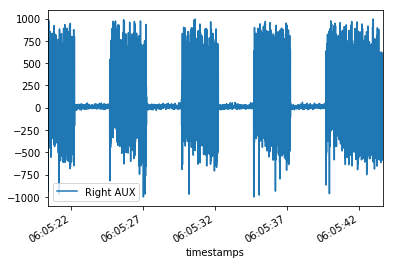

In [163]:
rec.plot(x='timestamps', y='Right AUX')

Note the high very different high and low sections, occuring due to the voltage being vectored via the audio level.

In [164]:
startRange = events['timestamp'][0]
endRange = events['timestamp'][1]

KeyError: 0

In [ ]:
samples = rec[(rec['timestamps'] > eventRange[1]) & (rec['timestamps'] < eventRange[2])]
samples